$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº2 | Modelos de Regresión}$$


_Integrantes:_

* _José Cebrián Baca_

* _Ana Lucia Manrique De La Torre_

* _Willy Valdivia_

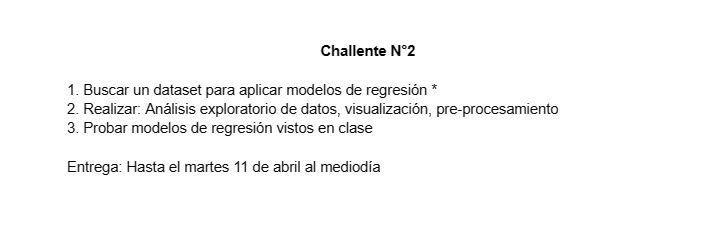

Dataset obtenido de: 

Insurance Premium Data [Internet]. www.kaggle.com. [cited 2023 Apr 11]. Available from: https://www.kaggle.com/datasets/simranjain17/insurance
‌

# Preprocesamiento de datos


In [29]:
!gdown https://drive.google.com/uc?id=18rcfoWrip2Z5A4GdqCMKZqg9Mja1QUsq

Downloading...
From: https://drive.google.com/uc?id=18rcfoWrip2Z5A4GdqCMKZqg9Mja1QUsq
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 62.7MB/s]


## Lectura de la base de datos

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [33]:
df.shape

(1338, 7)

In [34]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Revisar nulos y duplicados

In [36]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [37]:
df.duplicated().sum()

1

In [38]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [39]:
df = df.drop_duplicates()

## Visualización del comportamiento de la data

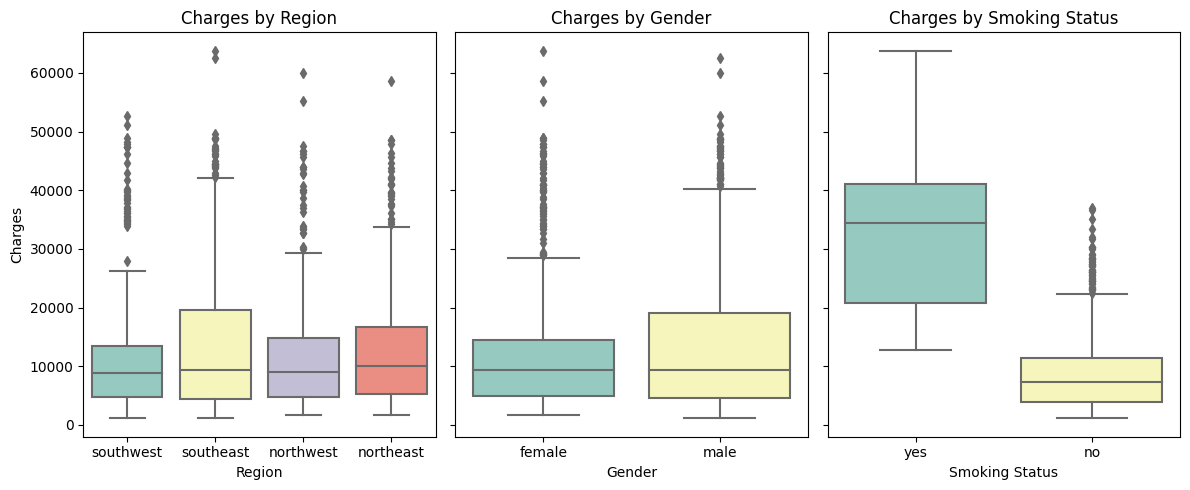

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(12,5))

sns.boxplot(x="region", y="charges", data=df, palette="Set3", ax=ax1)
sns.boxplot(x="sex", y="charges", data=df, palette="Set3", ax=ax2)
sns.boxplot(x="smoker", y="charges", data=df, palette="Set3", ax=ax3)

ax1.set_title("Charges by Region")
ax2.set_title("Charges by Gender")
ax3.set_title("Charges by Smoking Status")

ax1.set_xlabel("Region")
ax2.set_xlabel("Gender")
ax3.set_xlabel("Smoking Status")

ax1.set_ylabel('Charges')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

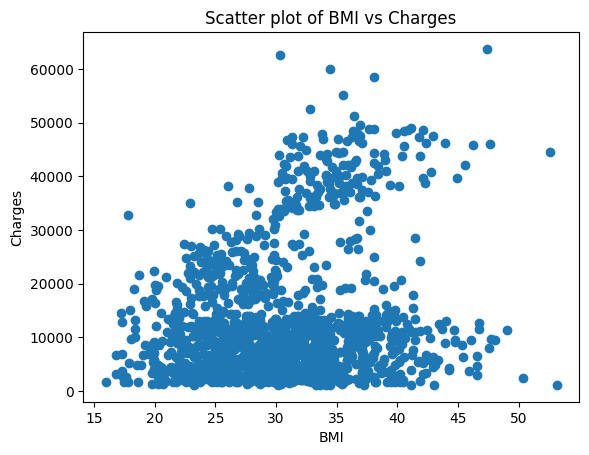

In [41]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter plot of BMI vs Charges')
plt.show()

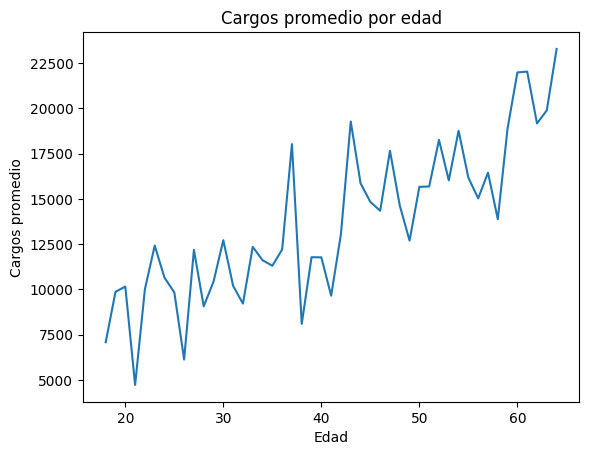

In [42]:
mean_charges_by_age = df.groupby('age')['charges'].mean()

plt.plot(mean_charges_by_age.index, mean_charges_by_age.values)
plt.xlabel('Edad')
plt.ylabel('Cargos promedio')
plt.title('Cargos promedio por edad')
plt.show()

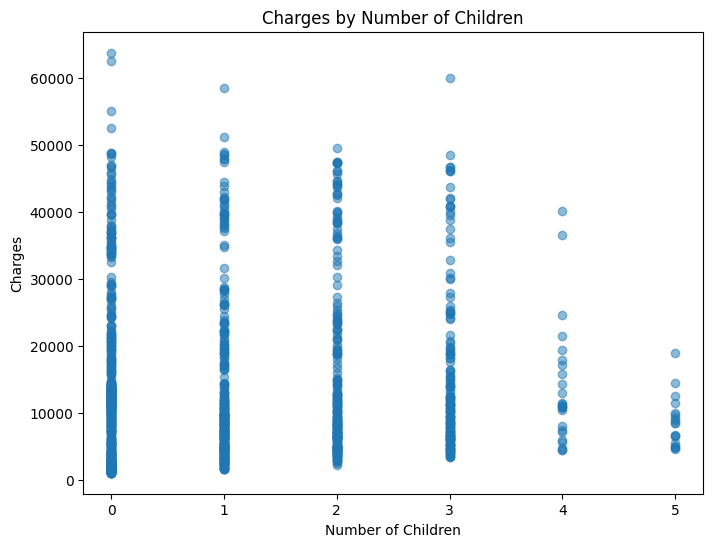

In [43]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(x="children", y="charges", data=df, alpha=0.5)

# Set the title and labels
plt.title("Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Charges")

# Show the plot
plt.show()

Smoker, Age, Children parecen ser un buenos feature para el modelo

<Axes: ylabel='Density'>

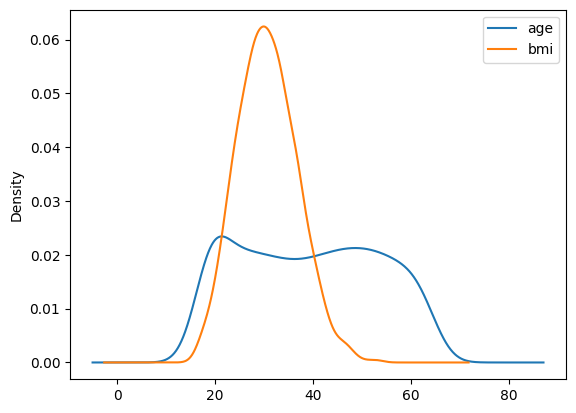

In [44]:
X[["age","bmi"]].plot(kind="kde")

<Axes: >

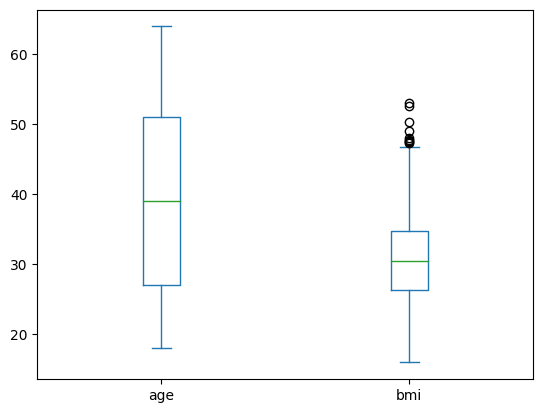

In [45]:
X[["age","bmi"]].plot(kind="box")

## Reescalado de la data numérica


Como las data de bmi y age tienen distribución normmal y con outliers se opta por usar StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler_robust = StandardScaler()
scaler_robust.fit(X[["age", "bmi"]])

StandardScaler()

<Axes: >

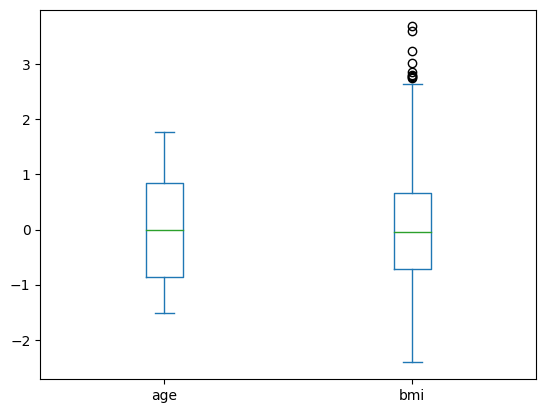

In [48]:
X[["age", "bmi"]] = scaler_robust.transform(X[["age", "bmi"]])
X[["age","bmi"]].plot(kind="box")

In [49]:
from sklearn.preprocessing import OneHotEncoder

Se enconderá la data categórica usando la librería OneHotEncoder para que puedan ser utilizadas como valores numéricos para poder calcular las predicciones.

In [50]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(X[['smoker', 'sex','region']]).toarray()
columns = encoder.get_feature_names_out(['smoker', 'sex','region'])
df_encoded = pd.DataFrame(encoded, columns=columns).astype(int)
X = pd.concat([X.drop(['smoker', 'sex', 'region'], axis=1).reset_index(drop=True), df_encoded], axis=1)
X

,age,bmi,children,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0,1,1,0,0,0,0,1
1,-1.509965,0.509621,1,1,0,0,1,0,0,1,0
2,-0.797954,0.383307,3,1,0,0,1,0,0,1,0
3,-0.441948,-1.305531,0,1,0,0,1,0,1,0,0
4,-0.513149,-0.292556,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,3,1,0,0,1,0,1,0,0
1334,-1.509965,0.206139,0,1,0,1,0,1,0,0,0
1335,-1.509965,1.014878,0,1,0,1,0,0,0,1,0
1336,-1.296362,-0.797813,0,1,0,1,0,0,0,0,1


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker_no         1338 non-null   int64  
 4   smoker_yes        1338 non-null   int64  
 5   sex_female        1338 non-null   int64  
 6   sex_male          1338 non-null   int64  
 7   region_northeast  1338 non-null   int64  
 8   region_northwest  1338 non-null   int64  
 9   region_southeast  1338 non-null   int64  
 10  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 115.1 KB


Se consiguió finalmente el dataframe de entrada al modelo, cada característica correctamente escalada y categorizada

# Modelos de regresión

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Regresión lineal

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)  

print(r2_test)

0.7999876970680433


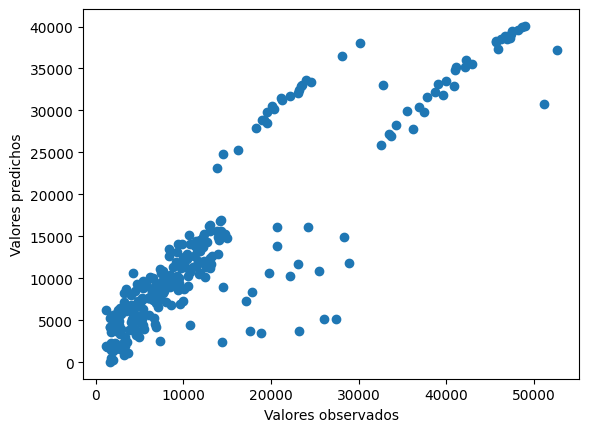

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores observados')
plt.ylabel('Valores predichos')
plt.show()

## Regresión polinomial


In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

poly_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

r2_poly = r2_score(y_test, poly_pred)  

print(r2_poly)

0.8802653113077501


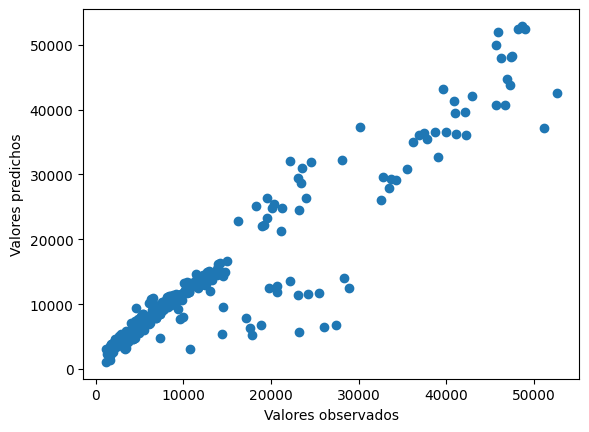

In [56]:
plt.scatter(y_test, poly_pred)
plt.xlabel('Valores observados')
plt.ylabel('Valores predichos')
plt.show()

Observamos un mejor rendimiento con respecto al R2 score del modelo de regresión polinomial frente al lineal